## Outline
- Business Case
- EDA
- Baseline Model
- Regularization
  
- Dropout
  
- Batch Normalization
  
- EarlyStopping
  


#Business Case

**Amazon** is facing a high surge of returns on some of its Products, which has led to the downgrade of the company credibility.

So they have appointed you as their Data Scientist:
- To estimate whether customer will return the product or not
- based on the product description, transportation, importance and prices

With this, lets load the data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!gdown 1mMRZKe5Qm99fJBE9y0mLdvVZYDfHvkxY
df = pd.read_csv('Amazon.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1mMRZKe5Qm99fJBE9y0mLdvVZYDfHvkxY
To: /content/Amazon.csv
100% 429k/429k [00:00<00:00, 161MB/s]


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **ID** | ID of Customers|
|02| **Warehouse_block** | The Company have big Warehouses which is divided in to block such as A,B,C,D,E|
|03|**Mode_of_Shipment**|The Company Ships the products in multiple way such as Ship, Flight and Road.|
|04|**Customer_care_calls**|The number of calls made from enquiry for enquiry of the shipment|
|05|**Customer_rating**| The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|06|**Cost_of_the_Product**|Price of the Product|
|07|**Prior_purchases**|The Number of Prior Purchases of the customer|
|08|**Product_importance**|The company has categorized the product in the various parameter such as low, medium, high.|
|09|**Gender**|If Customer is a Male or Female|
|10|**Discount_offered**|Discount offered on that specific product|
|11|**Weight_in_gms**|It is the weight in grams|
|12|**Returned**|It is the target variable, where 1 Indicates that the product is returned|


In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 10999 | 12 |

In [ ]:
df.shape

(10999, 12)

In [ ]:
X = df.drop(columns=['ID','Returned'])
y = df['Returned']

Splitting the data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (7039, 10) (7039,)
Validation: (1760, 10) (1760,)
Test  :  (2200, 10) (2200,)


#EDA


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/646/original/0.png?1693656798" width="800">

#### Which Encoding to use to transform Categorical features ?

Ans: Since there are many categories in all the Categorical features,
- Which will make the One-Hot Encoding quite large and sparse
- Its better to use Target Encoding



#### How do target encoding ?
Ans: Target Encoding finds the Probability of $y =$(some class$k$) when the Categorical feature $(f) = C_i$
- $P(y=k|f=C_i)$
- And replace the all the samples which have feature value as $C_i$ to  $P(y=k|f=C_i)$

```
Suppose y = [0,1] and f = [c1,c2,c3] such that:
- out of 200 samples, 50 samples have y = 1, when f = c1
-  25 samples have y = 1, when f = c2
-  And, 10 samples have y = 1, when f = c3
```
#### What is the Target Encoding value for the feature ?

Ans: $P(Y=1 | f= C_1) = \frac{50}{200} = 0.25$
- $P(Y=1 | f= C_2) = \frac{25}{200} = 0.13$
- $P(Y=1 | f= C_3) = \frac{10}{200} = 0.05$

<br>

With this, lets implement Target Encoding


In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder


Converting all the Categorical Features to Numerical
- using TargetEncoding

In [ ]:
enc = TargetEncoder(cols=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])
X_train = enc.fit_transform(X_train, y_train)

X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
10286,0.578005,0.608167,6,2,196,2,0.600878,0.596148,10,5180
7746,0.600336,0.600251,4,3,228,5,0.600878,0.599487,9,1044
1789,0.601109,0.608167,5,2,231,4,0.586928,0.596148,41,2992
2521,0.601109,0.600251,6,4,221,10,0.586928,0.596148,42,2972
10404,0.600336,0.576471,5,3,243,6,0.600878,0.599487,1,1856


#Standardization

**Observe**
- How the data is not Standardized

<br>

Lets Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/647/original/0.png?1693657082" width="600">

#### What happens if the data is not standardized ?
Ans: if data is not standardized, then suppose:
- if one feature has a range from 1 to 1000, and the other has a range from 0 to 1
- then the weights $w_1$ and $w_2$ assosicated to these features will vary in value alot
 - With $w_1$ being a very high value as compared to $w_2$


Thus the plot for Loss function ( $L(w,b) = \frac{1}{2n} \sum_{i=1}^{i=n} L(\hat{y_i},y_i)$ ) against the weights for n samples:
- Becomes a squashed, very unsymmetric and closed

<br>

#### Why there  is an issue with a squashed and closed Loss function plot ?
Ans: A very small Learning Rate will be required for gradient Descent to reach the global minima
- thus increasing the number of steps and time











<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/648/original/0.png?1693657136" width="600">

#### What happens when data is standardized ?

Ans: Since now the data is standardized, it makes:
- Range of both the feature 1 and feature 2 from 0 to 1

Thus making the weights for both the features close to each other
- Therefore the plot for Loss function ( $L(w,b)$)becomes
 - Spread out and Symmetric


#### Why a Spread out and Symmetric Loss function plot works fine ?
Ans: We can use a much large Learning rate to quickly reach the global minima

# Baseline Model

Now that the data is ready, we can implement
- A simple NN model using [tensorflow keras](https://keras.io/api/)
- By creating 5 layered NN such that:

|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 256 Neurons|
|**L3**| |Contains 128 Neurons|
|**L4**| |Contains 64 Neurons|
|**L5**| |Is the Output Layer |

<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1 , activation = 'sigmoid')])
  return model

#### What Loss to use when the final layer Neuron output $(\hat{y} = a^5_1) \in [0,1] $ while $y \in$ { $0,1$ } ?

Ans: Recall from Logisitic Regression:
- when Sigmoid $σ(z) \in (0,1)$ and $y = \in $ {$0,1$}
- LogLoss was used. $Logloss (L) = -y  \times log(\hat{y}) - (1-y) \times log(1-\hat{y}) $

Hence here too, LogLoss can be used.

<br>

**Note:** Logloss in Tensorflow Keras is implemented using ```BinaryCrossentropy()```




In [ ]:
model = create_baseline()

Using ```Adam``` as Optimizer and metric being ```Accuracy```

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])


Loading Tensorboard

In [ ]:
%load_ext tensorboard

from datetime import datetime
now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"


Clearing any running logs

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128, verbose=0,callbacks=[tb_callback])


Lets check the Model performance on Training and Validation data

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.7198


[0.48080185055732727, 0.7198465466499329]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.6415


[0.5430204272270203, 0.6414772868156433]

Lets plot the Accuracy vs Epochs plots for both training and Validation
- for better clarity

In [ ]:
%tensorboard --logdir={log_folder}

**Observe**

The model has:
- training accuracy : 69.9%
- and Validation accuracy : 64%

<br>

#### What can we understand from model's  training accracy being 69.9% and Validaiton Accuracy being 64% ?

Ans: Clearly, the model overfits the data meaning:
- Model has a low Bias
- But a High Variance

<br>

#### How can we make the baseline model not Overfit ?
Ans: By using Regularization


# Regularization

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/649/original/0.png?1693657616" width="800">

#### What Regularization method to use ?
Ans: Recall from ML module, we used L-1 and L-2 regularization methods to
- resolve overfitting of the model

<br>

Also, L2 Regularization for n samples with  d features is defined as:
- $L2 = \frac{λ}{2n} \sum_{j=0}^{i=d} ||w_j||_2^2 $

<br>

#### Can we use L2 Regularization in NN ?
Ans: No, since in NN there is
- L Weight matrices for each layer {$W^1,W^2,..,W^L$}
- While in Machine Learning there is only a single weight matrix $W$


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/650/original/0.png?1693657661" width="800">


<br>

#### How to do Regularization in NN ?
Ans: Now if we assume that
- the number of neurons in the current layer $k$ is $n^k$
- and the number of neurons in the previous layer $k-1$ is $n^{k-1}$

Then Regularization:
- $Reg = \frac{\lambda}{2n}\sum_{k=1}^{k=L}||W^k||_F^2 $

<br>

Where we define $||W^k||_F^2 $ as:
- $\sum_{i=1}^{n^{k-1}}\sum_{j=1}^{n^k} (w_{ij}^{k})^2 $


<br>

**Note**: The term $||W||_F^2$ is called **Forbenius Norm**


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/651/original/0.png?1693657739" width="800">

#### How does weight updation occur with Regularization ?
Ans: With regularization the loss function will be defined as:

- $Loss = \frac{1}{2n}\sum_{i=1}^{i=n}L(\hat{y_i},y_i) + \frac{\lambda}{2n}\sum_{k=1}^{k=L}||W^k||_F^2 $

<br>

#### What will be the gradient ($dw^L$) ?
Ans: $dw^L$ $=$ (From Backpropagation) $+ \frac{\lambda}{n} W^L $

#### How do we do the weight updation ?
Ans: if Learning Rate is α, then:
- Weight updation: $W^L = W^L - α \times dw^L$

Therefore:
- $W^L = W^L-\frac{αλ}{n}W^L - α$(From Backpropagation)

On Simpliying:
- $W^L = (1-\frac{αλ}{n}) \times W^L - α$(From Backpropagation)

<br>

**Note:** Due to the extra $(1-\frac{αλ}{n})$,
- L2 Regularization is also called **Weight Decay**

Lets now implement  L2 Regularization on the Baseline Model  

In [ ]:
def create_baseline():
    # lambda = 0.01
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, activation="relu", kernel_regularizer = L2Reg ),
                    Dense(128, activation="relu", kernel_regularizer = L2Reg),
                    Dense(64, activation="relu", kernel_regularizer = L2Reg),
                    Dense(1 , activation = 'sigmoid')])
    return model

In [ ]:
model = create_baseline()

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])


Loading Tensorboard

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Training the model

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128, verbose=0,callbacks=[tb_callback])

Evaluating the model

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.7133


[0.4818527400493622, 0.7133115530014038]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.6284


[0.5486941337585449, 0.6284090876579285]

In [ ]:
%tensorboard --logdir={log_folder}

**Observe**

Even with L2 Regularization:
- the model performance didnot improve drastically



#Dropout

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/652/original/0.png?1693658062" width="800">

#### What is causing the NN model to overfit ?
Ans: Observe that:

|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 256 Neurons|
|**L3**| |Contains 128 Neurons|
|**L4**| |Contains 64 Neurons|
|**L5**| |Is the Output Layer |

<br>

In Layer 2 there are 256 Neurons while Layer 3  contains 128 neurons

#### What will be the dimension of Weight Matrix $W^2$ ?
Ans: $(256 \times 128)$

<br>

Now updating weights of such a high dimensional matrix:
- is what making the model complex
- which might be leading the model to overfit

<br>

#### How to resolve this weight update of $W^2 ∈ R^{256 \times 128}$ such that NN does not overfit ?

Ans: By not considering / dropping some weights value while computing $a^3$

<br>


#### How to drop these weights which make up $a^3$ ?

Ans: By creating a mask matrix ($d^2$) which contains some randomly generated numbers between (0,1) such that:

- $d^2 = 1 $ if, value of $d^2 >$ rate at which we drop the weight of a neuron ($r$)
- else $d^2 = 0$

**Note:** This rate $r$ is called as Dropout Rate

<br>

#### What will be the dimension of this mask matrix $d^2$ ?

Ans: Same as the Weight matrix
- $d^2 ∈ R^{256 × 128}$

#### How do we calculate $a^3$ ?

Ans: As $a^3 = g( a^2 × W^2 + b^2 )$, but now we do:
- an **elementwise multiplication** between $d^2$ and $W^2$
 - $ d^2 ∘ W^2 $

<br>

Hence, we can say:
- $a^3 = g(a^2 × (W^2 ∘ d^2) + b^2) $


**Note:** This process of removing/ dropping the weights is called **Edge Dropout**

<br>



There is another approch to **Dropout**, where the Neurons are dropped instead of the  Weights :
- By creating the mask $d^2$ for the neurons instead of weights,
- And dividing the neurons by a probability factor $p = 1 - r$

[Understanding dropout](https://programmathically.com/dropout-regularization-in-neural-networks-how-it-works-and-when-to-use-it/)







<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/653/original/0.png?1693658195" width="800">

Lets take an example for better Understanding **Edge Dropout**

Assuming a NN layer has 2 neurons and the following layer has 3 neurons such that:

- $a^2 = [0.5, 0.3]$ , $W^2 = [[1,2,3] ,[4,5,6]]$ and $b^2 = [1, 1, 1]$

<br>

Now if we create a random probability matrix for values of $W^2$ such that:
- $ p(W^2) = [[0.6 , 0.8 , 0.1 ],[0.2 , 0.16 , 0.44]] $

<br>

#### If the Dropout Rate $r = 0.2$,  what will be $d^2$ ?
Ans: Since $d^2 = 1$ if $d^2>0.2$, hence:
- $d^2 = [ [1,1,0],[0,0,1] ]$

<br>

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/654/original/0.png?1693658300" width="800">



#### What will be the value of $d^2 ∘ W^2 $ (Elementwise multiplication) ?
Ans: $d^2 ∘ W^2  = [[1,2,0],[0,0,6]]$

#### What will be $a^3$ ?

Ans: $a^3 = g( [0.5, 0.3]\times [[1,2,0],[0,0,6]] + [1,1,1])$

On solving, we get:
- $a^3 = g( [0.5 , 1.0 ,  1.8] + [1,1,1]) = g([1.5, 2.0, 2.8])$





<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/655/original/0.png?1693658346" width="800">

#### Will the Backpropagation for $W^1_{11}$ be affected if we drop $W^2_{11}$ ?


Ans: Lets understand it by doing a backpropagation when $W^2_{11}$ is not dropped.

- $\frac{\partial L}{\partial W^1_{11}} = \frac{\partial L}{\partial a^3_{1}} \times  \frac{\partial a^3_{1}}{\partial z^3_{1}} \times \frac{\partial z^3_{1}}{\partial a^2_{1}}  \times \frac{\partial a^2_{1}}{\partial z^2_{1}} \times \frac{\partial z^2_{1}}{\partial a^1_{1}} \times \frac{\partial a^1_{1}}{\partial z^1_{1}} \times \frac{\partial z^1_{1}}{\partial W^1_{11}} + \frac{\partial L}{\partial a^3_{1}} \times  \frac{\partial a^3_{1}}{\partial z^3_{1}} \times \frac{\partial z^3_{1}}{\partial a^2_{2}}  \times \frac{\partial a^2_{2}}{\partial z^2_{2}} \times \frac{\partial z^2_{2}}{\partial a^1_{1}} \times \frac{\partial a^1_{1}}{\partial z^1_{1}} \times \frac{\partial z^1_{1}}{\partial W^1_{11}} $


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/656/original/0.png?1693658419" width="800">


Now if $W^2_{11}$ is dropped:
- $\frac{\partial L}{\partial W^1_{11}} = \frac{\partial L}{\partial a^3_{1}} \times  \frac{\partial a^3_{1}}{\partial z^3_{1}} \times \frac{\partial z^3_{1}}{\partial a^2_{2}}  \times \frac{\partial a^2_{2}}{\partial z^2_{2}} \times \frac{\partial z^2_{2}}{\partial a^1_{1}} \times \frac{\partial a^1_{1}}{\partial z^1_{1}} \times \frac{\partial z^1_{1}}{\partial W^1_{11}} $

**Note :** Since $W^2_{11}$ is dropped, the weights are not updated only for this weight value.

<br>
<br>

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/657/original/0.png?1693658482" width="800">


If $r= 0.2$, and the model is trained for 10 epochs and it runs 5 iterations per epoch.

#### Can we say, that the weights which are dropped gets their weight updated for all $10 \times 5 = 50 $ training steps ?
Ans: No, because of the fact there is a 20% drop rate:
- The weights are updated for only $50 \times (1-0.2) = 40$ training steps

- This dropping of weights helps the neurons to not be inclinced towards any one particular feature
 - as that feature weight can be dropped off
- Thus regularizing the model by giving importance to every neuron/feature.

<br>

#### Then how during test time, the weights of the model accomidate this $40 $ training step ?
Ans: During the test time,
- Each weight of the model are multiplied with $p = 1- r $

#### Will there be dropout during test time ?
Ans: No




With this lets now implement Dropout using Tensorflow Keras

In [ ]:
from tensorflow.keras.layers import Dropout
def create_Dropout():
    # lambda = 0.01
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, activation="relu", kernel_regularizer = L2Reg ),
                    Dropout(0.3),
                    Dense(128, activation="relu", kernel_regularizer = L2Reg),
                    Dropout(0.3),
                    Dense(64, activation="relu", kernel_regularizer = L2Reg),
                    Dense(1 , activation = 'sigmoid')])
    return model

In [ ]:
model = create_Dropout()

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])


In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Training the model

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Evaluating the model

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.6934


[0.5025047659873962, 0.6934223771095276]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.6483


[0.5379933714866638, 0.6482954621315002]

**Observe**

using Dropout and Regularization,
- the model did reduce its overfitting

# Batch Normalization


#### What other Hyperparameter tuning techniques we can apply to make the model perform better ?
Ans: Recall that, we always standardize the inputs to the model for Gradient Descent to quickly reach global minima.

Now if we have a four layer NN, such that:

- the output of Layer2 ($a^2$) becomes input for layer 3
- With weight matrix as $W^3$ with bias as $b^3$

<br>

#### Will the input for layer 3 still be in normalized form ?

Ans: **NO**. Clearly, the input to each layer is affected by the weights and biases of the previous layers.

So now imagine, there due to data being not normalizied
- there is a 0.1% change in data distribution

#### What will happen if this change in distribution goes down a 100 layer Neural Network ?

Ans: This 0.1% change gets amplified when going down the network

- This leads to change in the input distribution to hidden layers of the network
- and the weights updation gets impacted

This is whats called an **internal covariate shift**  

<br>

#### Can we normalize $a^2$ so to make $w^3$ and $b^3$ optimum ?

Ans: Yes we can, now if we consider m number of neurons in Layer 2,
- then $z_i^2.....z_m^2$ becomes the neuron output before the activation function

<br>

Therefore we can say:

- the mean $μ = \frac{1}{m} ∑_{i=1} ^{i=m} z_i$

<br>

- the variance $σ^2 =\frac{1}{m} ∑_{i=1} ^{i=m} (z_i-μ)^2 $

<br>

Then the normalized $z_i$ ($znorm_i$) becomes:
- $znorm_i = \frac{z_i-μ}{\sqrt{σ^2+ϵ}}$
Where ϵ is a very small value $1e^{-10}$ to prevent the denominator to turn 0 when variance is 0

<br>

#### but do we want to have all the hidden layers to have outputs with exact mean = 0  and variance = 1 ?
Ans: No, because if two hidden layers have the same distribution of mean = 0 and variance = 1
- the information learnt about the data for both the layers will be almost same

Thus making the use of the 2nd hidden layer redundant.  

Please read [Expressive-Power-Of-NeuralNetwork](https://stats.stackexchange.com/questions/272010/batch-normalization-shift-scale-parameters-defeat-the-point) for proof

<br>

#### how to make the distribution slightly different for each hidden layer ?

Ans: By scaling and shifting the $znorm_i$ by using two learnable parameters ($γ, β$) such that:

- $ \hat{z_i} = γ \times znorm_i + β $


**Note:** This Entire  process of normalization with scaling and shifting is known as **Batch Normalization**






Lets now implement Batch Normalization in the Baseline Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

def create_BatchNormalization_model():
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, kernel_regularizer = L2Reg),
                    BatchNormalization(),
                    Activation(relu),
                    Dropout(0.2),
                    Dense(128, kernel_regularizer = L2Reg),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(64,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(3)])
    return model

In [ ]:
model = create_BatchNormalization_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Increasing epoch to 15 now

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0,callbacks=[tb_callback])


Evaluting the model

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 2ms/step - loss: 2.3278 - accuracy: 0.6453


[2.327779531478882, 0.6452621221542358]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 2.5997 - accuracy: 0.6324


[2.5997164249420166, 0.6323863863945007]

In [ ]:
%tensorboard --logdir={log_folder}

We see after applying Batch Normalization :
- L2 Regularization worked
- And made the model not overfit the data  

# Early Stopping

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/658/original/0.png?1693660433" width="800">

**Observe**

When using Batch Normalization,
- around epoch 8 the  Validation Accuracy is maximum,
- and then it starts to decrease

<br>

#### Can there be a way to make the model not update the weights after the validation accuracy reaches maximum ?

Ans:  Yes, by using callbacks to stop the training when:
- The validation accuracy starts decreasing
- or validation loss starts to increase

<br>

#### How to know if the model has reached maximum validation accuracy  or not?

Ans: By using callbacks such that:
- One callback stores the weights of model when best validation accuracy is attained
- While the other callback, Stops the training:
 - after not finding a better validation accuracy, when the model is trained for some epoch ($τ$)

<br>

**Note**: Keras uses ```EarlyStoppingCallback``` for:
- stopping the training after no better Validation accuracy attained when ran for some epoch ($τ$)    

Also keras uses another callback  ```ModelCheckpointCallback``` for:
- Storing the weights of the model which had the best Validation Accuracy





In [ ]:
model = create_BatchNormalization_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [ ]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50,  restore_best_weights=True)
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
                                                             monitor='val_accuracy',
                                                             save_best_only=True,
                                                             mode='max')

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0, callbacks=[EarlyStoppingCallback, ModelCheckpointCallback,tb_callback])


In [ ]:
%tensorboard --logdir={log_folder}

Loading the model where the EarlyStopping took place

In [ ]:
model = create_BatchNormalization_model()
model.build(input_shape =(None,10))

In [ ]:
model.load_weights('tf_model.h5')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 3ms/step - loss: 1.2022 - accuracy: 0.6465


[1.2022379636764526, 0.6465407013893127]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 1.3301 - accuracy: 0.6301


[1.3301416635513306, 0.6301136612892151]

In [ ]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 1.2194 - accuracy: 0.6286


[1.2193852663040161, 0.628636360168457]

In [ ]:
output = model.predict(X_test)

69/69 [==============================] - 0s 2ms/step


As```output``` is just the probability of $Y=1$ or $Y=0$ based on the feature X,
- Using a threshold $ γ = 0.5 $ so that ```output``` $\in ${$0,1$}

In [ ]:
y_pred = np.array([1 if i > 0.5 else 0  for i in output])

Plotting Confusion Matrix

Text(0.5, -28.828503717825924, 'Predicted label')

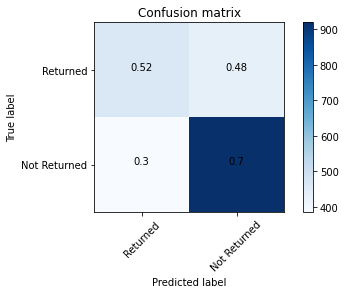

In [ ]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()

class_names = ['Returned','Not Returned']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix.
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# Use white text if squares are dark; otherwise black.
threshold = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color =  "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


**Observe**

Though the model performs pretty good , it still has a significantly **high False Positive**:
- Showing that maybe a more complex model might be needed to for a better performance

Plotting ROC Curve

In [ ]:
fpr,tpr,_ = sklearn.metrics.roc_curve(y_test,output.squeeze(axis=1))

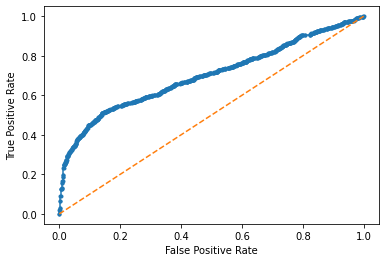

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

**observe**

Clearly the model outperforms a mean model